<a href="https://colab.research.google.com/github/abdcdkee/Image-Classification-via-Neural-Networks/blob/main/Classification_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1.

In [ ]:
import tensorflow
%tensorflow_version 1.x

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()    #Data Loaded

#x_train has the training data set and y_train the corresponding labels. Similarly we have defined x_test and y_test

#The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images 
#and 10000 test images.

#The 10 classes are:
#airplane
#automobile
#bird
#cat
#deer
#dog
#frog
#horse
#ship
#truck

#There can be several steps carried out for preprocessing image data. Normalization is of course a fundamental step in preprocessing. 
#Various filters can be used for noise removal. We can use morphology for smoothing edges. We can also resize the image if required.
#We can perform pixel brightness correction or grayscale transformation before further processing. All of these steps serve to enhance 
#the efficiency of image processing. 

TensorFlow is already loaded. Please restart the runtime to change versions.


Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


#Q2.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input Shape:  (32, 32, 3)
------------------------------------------------------
[[2 4 3]
 [5 8 7]
 [6 9 7]]
Output with 3x3 filter, Padding = False, Normalization = False, Shape:  (3, 3)
------------------------------------------------------
Output with 3x3 filter, Padding = False, Normalization = True, Shape:  (30, 30, 3)
------------------------------------------------------
Output with 3x3 filter, Padding = True, Normalization = False, Shape:  (32, 32, 3)
------------------------------------------------------
Output, Padding = Normalization = True, Shape:  (32, 32, 3)
------------------------------------------------------
Output with new filter, Padding = Normalization = True, Shape:  (32, 32, 3)
------------------------------------------------------
2D Input Image, Shape:  (33, 33)
------------------------------------------------------
2D Output, Padding = Normalization = True, Shape:  (32, 32, 3)
------------------------------------------------------


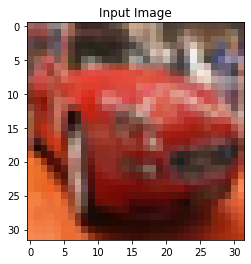

<Figure size 432x288 with 0 Axes>

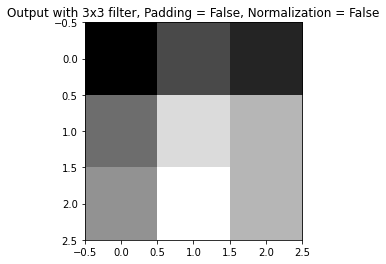

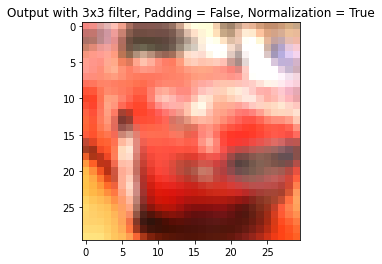

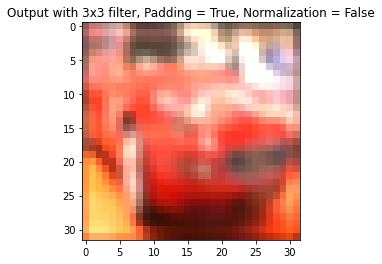

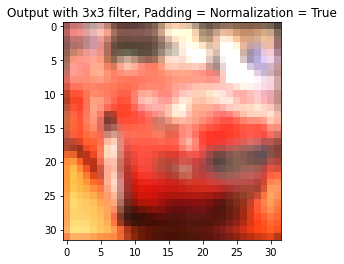

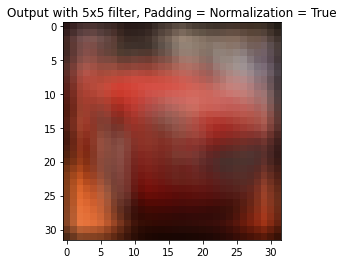

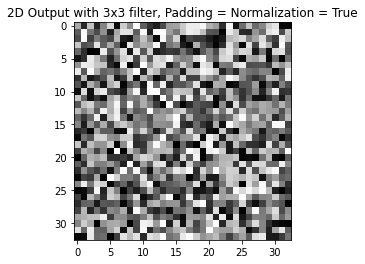

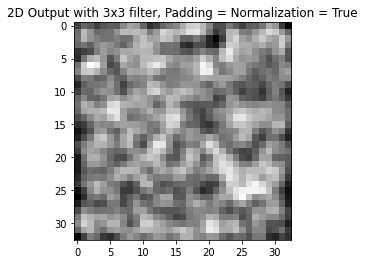

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import cifar10
import random

(x_train, y_train), (x_test, y_test) = cifar10.load_data()    #Data Loaded

#test filter and image used to debug function
test_filt = np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]])
test_filt_2 = np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
test = np.array([[4, 7, 1, 4 , 5], [2, 0, 0, 1, 3], [5, 6, 1, 1, 1], [2, 0, 3, 4, 5], [1, 1, 1, 1, 0]])
rob = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])

#2D test image
temp1 = []
for i in range (0,33):
  temp2 = []
  for j in range (0,33):
    temp2.append(random.randint(0, 255))
  temp1.append(temp2)
d2 = np.array(temp1)

#Test input data
x_train_new = np.array(x_train)
x_test_new = np.array(x_test)



#Function returns pixel value of a pixel in resultant image after filter is applied
def set_pixel(input, filter, width, height, channels, filt_height, filt_width, i, j):
    size = filt_width*filt_height
    sum = 0

    h = -1
    w = -1
    for p in range(i-filt_height//2, i+filt_height//2+1):
        h = h+1
        w = -1
        for q in range(j-filt_width//2, j+filt_width//2+1):
            w = w + 1
            sum = sum + input[p][q]*filter[h][w]

    return int(sum/size)


#Function essentially iterates over entirety of (one channel) input image and applies set_pixel function over each pixel. 
def apply_filter(input, filter, padding, normalization, width, height, channels, filt_height, filt_width):
    if padding == True:
        pad_width = filt_width//2
        pad_height = filt_height//2
        padded_image = np.zeros((width + 2*pad_width, height + 2*pad_height), dtype = int)

        for i in range(0, height):
            for j in range(0, width):
                padded_image[i+pad_height][j+pad_width] = input[i][j]
                pad_width = pad_width

        buffer = np.empty((width + 2*pad_width -filt_width+1, height + 2*pad_height -filt_height+1), int)

        for i in range(filt_height//2, height + 2*pad_height - filt_height//2):
            for j in range(filt_width//2, width + 2*pad_width - filt_width//2):
                pixel = set_pixel(padded_image, filter, width + 2*pad_width, height + 2*pad_height, channels, filt_height, filt_width, i, j)
                buffer[i - filt_height//2][j - filt_width//2] = pixel      


    else: 
        buffer = np.empty((width-filt_width+1, height-filt_height+1), int)

        for i in range(filt_height//2, height - filt_height//2):
            for j in range(filt_width//2, width - filt_width//2):
                pixel = set_pixel(input, filter, width, height, channels, filt_height, filt_width, i, j)
                buffer[i - filt_height//2][j - filt_width//2] = pixel
    return buffer


#Filter utilizes above defined functions to apply filters to an image
def filt(input, filter, padding, normalization):  

    height = len(input)
    width = len(input[0])
    #Condition checks if input image has one or multiple channels
    if isinstance(input[0][0], np.ndarray) == True:
      channels = len(input[0][0])
    else:
      channels = 1

    #Define filter parameters
    filt_size = filter.shape
    filt_height = filt_size[0]
    filt_width = filt_size[1]

    #Call apply filter for one channel input image
    if channels == 1: 
        filtered_image = apply_filter(input, filter, padding, normalization, width, height, channels, filt_height, filt_width)
        return filtered_image
    else:
        #Condition splits mutli-channel input image into multiple single channel images, applies filters
        #to get multiple output single channel image, and recombines into a multichannel output image.
        split = np.empty((width, height),int)
        if padding == True:
            combine = np.empty((width, height, channels), int)
            for i in range(0,channels):
              for p in range(0, height):
                  for q in range(0, width):
                    split[p][q] = input[p][q][i]
              filtered_image = apply_filter(split, filter, padding, normalization, width, height, channels, filt_height, filt_width)
              for k in range(0, height):
                  for l in range(0, width):
                    combine[k][l][i] = filtered_image[k][l]
        else:
            combine = np.empty((width-filt_width+1, height-filt_height+1, channels), int)

            for i in range(0,channels):
              for p in range(0, height):
                  for q in range(0, width):
                    split[p][q] = input[p][q][i]
              filtered_image = apply_filter(split, filter, padding, normalization, width, height, channels, filt_height, filt_width)
              for k in range(0, height-filt_height+1):
                  for l in range(0, width-filt_width+1):
                    combine[k][l][i] = filtered_image[k][l]
    
    #Normalized by x/255 as we want output between 0 and 1.
    if normalization == True:
        combine = combine/255

    return combine

#Test Conditions: Input images and output images at different configurations with gaussian filter
print("Input Shape: ", x_train_new[5].shape)
plt.imshow(x_train_new[5], cmap = 'gray')
plt.title('Input Image')
print("------------------------------------------------------")
plt.figure()
result = filt(rob, test_filt, True, False)
print(result)
plt.figure()
print("Output with 3x3 filter, Padding = False, Normalization = False, Shape: ",result.shape)
plt.imshow(result, cmap = 'gray')
plt.title('Output with 3x3 filter, Padding = False, Normalization = False')
print("------------------------------------------------------")
result1 = filt(x_train_new[5], test_filt, False, True)
plt.figure()
print("Output with 3x3 filter, Padding = False, Normalization = True, Shape: ",result1.shape)
plt.imshow(result1, cmap = 'gray')
plt.title('Output with 3x3 filter, Padding = False, Normalization = True')
print("------------------------------------------------------")
result2 = filt(x_train_new[5], test_filt, True, False)
plt.figure()
print("Output with 3x3 filter, Padding = True, Normalization = False, Shape: ", result2.shape)
plt.imshow(result2, cmap = 'gray')
plt.title('Output with 3x3 filter, Padding = True, Normalization = False')
print("------------------------------------------------------")
result3 = filt(x_train_new[5], test_filt, True, True)
plt.figure()
print("Output, Padding = Normalization = True, Shape: ", result3.shape)
plt.imshow(result3, cmap = 'gray')
plt.title('Output with 3x3 filter, Padding = Normalization = True')
print("------------------------------------------------------")
result4 = filt(x_train_new[5], test_filt_2, True, True)
plt.figure()
print("Output with new filter, Padding = Normalization = True, Shape: ", result4.shape)
plt.imshow(result4, cmap = 'gray')
plt.title('Output with 5x5 filter, Padding = Normalization = True')
print("------------------------------------------------------")
plt.figure()
print("2D Input Image, Shape: ", d2.shape)
plt.imshow(d2, cmap = 'gray')
plt.title('2D Output with 3x3 filter, Padding = Normalization = True')
print("------------------------------------------------------")
result5 = filt(d2, test_filt, True, True)
plt.figure()
print("2D Output, Padding = Normalization = True, Shape: ", result4.shape)
plt.imshow(result5, cmap = 'gray')
plt.title('2D Output with 3x3 filter, Padding = Normalization = True')
print("------------------------------------------------------")


#This was a very interesting question. I mainly employed my mathematical knowledge and what we learned in theory instead of using complex
#CV libraries which means my grasp over the working of this question is the best. I learned about how filters works and how padding and 
#normalized images look first hand. I faced difficulty in considering how to account for multichannel images at first, but then my idea of 
#splitting and recombining images worked really well. In fact, I believe I have now generalized my function for n channels instead of just
#the 3 RGB channels. 


#Q3.

In [ ]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from keras.datasets import cifar10
import matplotlib.pyplot as plt

#Load input data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Convert input to numpy
x_train_new = np.array(x_train)
x_test_new = np.array(x_test)

#Convert input data to grayscale. Can instead also account for multiple channels by assinging multichannel = True in the hog function below
test_data_gray = [ color.rgb2gray(i) for i in x_test_new]
train_data_gray = [ color.rgb2gray(i) for i in x_train_new]

#Extract HOG features for training images
ppc = 8
hog_images = []
train_hog_features = []
for image in train_data_gray:
    fd= hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),visualize=False,block_norm= 'L2')#, multichannel=True)
    train_hog_features.append(fd)

#Extract HOG features for testing images
ppc = 8
hog_images = []
test_hog_features = []
for image in test_data_gray:
    fd= hog(image, orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(2, 2),visualize=False,block_norm= 'L2')#, multichannel=True)
    test_hog_features.append(fd)

#Create a Linear SVC model
clf = svm.LinearSVC()

#Convert HOG features to numpy arrays
train_hog_features = np.array(train_hog_features)
test_hog_features = np.array(test_hog_features)

#Convert image labels to desired form
y_train = y_train.ravel()
y_test = y_test.ravel()

#Create model using training data
clf.fit(train_hog_features,y_train)
#Check model accuracy using test data
clf.score(test_hog_features, y_test)

#This was the toughest question. I went through multiple iterations for this. Even explored algorithms that were producing histograms or 
#HOG images which I later realzied was not really required in this question. I tried using Open CV helper functions but was having some
#issues that some functions were apparently not compatible with colab. Overall, this was a really interesting problem to work on. I also 
#had to play around with the parameters quite a bit to obtain the desired accuracy.

#Accuracy Obtained = 52.46%


0.5246

#Q4A.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3, 1)]    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               5248

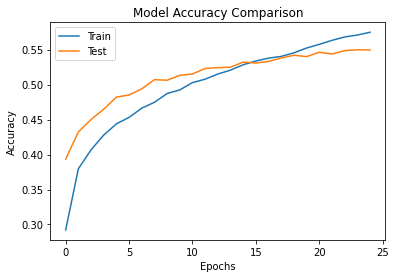

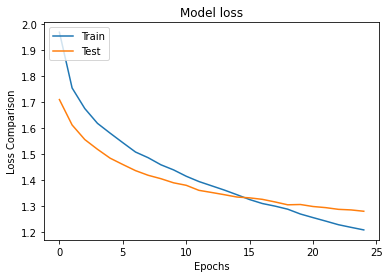

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Let's preprocess the input data
means = x_train.mean(axis = 0)
stddev = x_train.std(axis = 0)
x_train = (x_train-means)/stddev

means = x_test.mean(axis = 0)
stddev = x_test.std(axis = 0)
x_test = (x_test-means)/stddev

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Reshape input data as required
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

#Import required parameters
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

#Create a feedforward network consisting of dense layers only (with dropout funcitonality).
in1 = Input(shape = x_train[0].shape)
f1 = Flatten()(in1)
d1 = Dense(512, activation = 'relu')(f1)
dr1 = Dropout(0.3)(d1)
d2 = Dense(1024, activation = 'relu')(dr1)
dr2 = Dropout(0.3)(d2)
d3 = Dense(512, activation = 'relu')(dr2)
o = Dense(len(y_train[0]), activation = 'softmax')(d3)

#Create Model
model = Model(inputs = in1, outputs = o)
print(model.summary())

#Compile model and test on training data.
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['acc'])
record = model.fit(x_train, y_train, epochs = 25, batch_size = 128, validation_data=(x_test, y_test))


# Plot training & validation accuracy values on plots as required.
plt.plot(record.history['acc'])
plt.plot(record.history['val_acc'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()

# Plot training & validation loss values on plots as required.
plt.plot(record.history['loss'])
plt.plot(record.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss Comparison')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Values and graphs obtained can be seen in display window below.

#Parameters of the layers and number of layers themselves were obtained through trial and error. Program was run to 50 epochs for each 
#configuration to determine optimal set up. 

#Q4B.

Epoch 1/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9746 - acc: 0.2633 - val_loss: 1.6257 - val_acc: 0.4089
Epoch 2/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6066 - acc: 0.4019 - val_loss: 1.4186 - val_acc: 0.4816
Epoch 3/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4608 - acc: 0.4623 - val_loss: 1.3049 - val_acc: 0.5318
Epoch 4/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3691 - acc: 0.5011 - val_loss: 1.2717 - val_acc: 0.5444
Epoch 5/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2859 - acc: 0.5321 - val_loss: 1.1510 - val_acc: 0.5906
Epoch 6/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2219 - acc: 0.5589 - val_loss: 1.1066 - val_acc: 0.6045
Epoch 7/60
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1669 - acc: 0.5813 - val_loss: 1.1188 - val_acc: 0.6065
Epoch 8/60
1563/1563 [==============================] - 6s 4ms

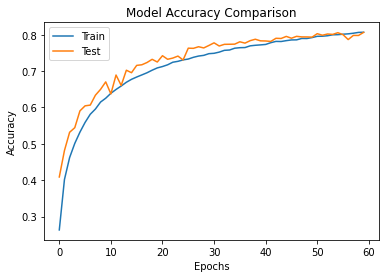

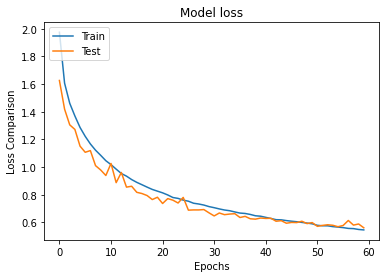

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Let's preprocess the data
means = x_train.mean(axis = 0)
stddev = x_train.std(axis = 0)
x_train = (x_train-means)/stddev

means = x_test.mean(axis = 0)
stddev = x_test.std(axis = 0)
x_test = (x_test-means)/stddev

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

#Define a model consisting mostly of convolutional and pooling layers. 
in1 = Input(shape = x_train[0].shape)
c = Conv2D(32, (3, 3), activation = 'relu', padding = 'valid')(in1)
c1 = Conv2D(32, (3, 3), activation = 'relu')(c)
m1 = MaxPooling2D()(c1)
dr1 = Dropout(0.25)(m1)
c2 = Conv2D(64, (3, 3), activation = 'relu', padding = 'valid')(dr1)
c3 = Conv2D(64, (3, 3), activation = 'relu')(c2)
m2 = MaxPooling2D()(c3)
dr2 = Dropout(0.5)(m2)
fl = Flatten()(dr2)
d1 = Dense(512, activation = 'relu')(fl)
dr3 = Dropout(0.5)(d1)
o = Dense(len(y_train[0]), activation = 'softmax')(dr3)

#Create Model
model = Model(inputs = in1, outputs = o)
#print(model.summary())

#Compile model and test on training data.
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['acc'])
record = model.fit(x_train, y_train, epochs = 60, batch_size = 32, validation_data=(x_test, y_test))


# Plot training & validation accuracy values
plt.plot(record.history['acc'])
plt.plot(record.history['val_acc'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(record.history['loss'])
plt.plot(record.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss Comparison')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Values obtained are as follows:
#Loss: 0.5452         Validation Loss: 0.5605
#Accuracy: 80.68%     Validation Accuracy: 80.65%
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5452 - acc: 0.8068 - val_loss: 0.5605 - val_acc: 0.8065

#Parameters of the layers and number of layers themselves were obtained through trial and error. Program was run to 100 epochs for each 
#configuration to determine optimal set up. Then run to 60 epochs because the next 40 were more or less redundant. 


#Q4C.

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

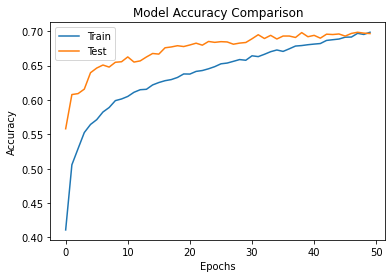

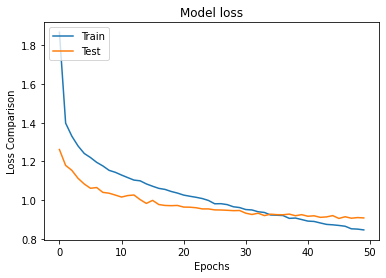

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.layers import BatchNormalization
import cv2
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Let's preprocess
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Define a model for VGG16, not including the final layers. i.e. model cut off just before the flatten layer. Used for feature extraction only.
model = VGG16(include_top=False, input_shape=(32, 32, 3))
#print(model.summary())

#Train only the layers after the VGG16 feature extraction layers. 
for layer in model.layers:
    layer.trainable=False

#Add new layers to be part of our classifier
f1 = Flatten()(model.layers[-1].output)
#n = BatchNormalization()(f1)
dr1 = Dropout(0.3)(f1)
c1 = Dense(2048,  activation='relu')(dr1)
dr2 = Dropout(0.3)(c1)
c2 = Dense(1024, activation='relu')(dr2)
dr3 = Dropout(0.3)(c2)
c3 = Dense(512, activation='relu')(dr3)
dr4 = Dropout(0.3)(c3)
output = Dense(10, activation='softmax')(dr4)

#Define new model combining the partial VGG16 model with our layers attached at the end
model_1 = Model(inputs=model.inputs, outputs=output)

#Note how model_1 corresponds to VGG16 model
model_1.summary()
#print(model_1.summary())

#Train and Test model
model_1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['acc'])
record = model_1.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_data=(x_test, y_test))


# Plot training & validation accuracy values
plt.plot(record.history['acc'])
plt.plot(record.history['val_acc'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure()
# Plot training & validation loss values
plt.plot(record.history['loss'])
plt.plot(record.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss Comparison')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



#Values obtained are as follows:
#Loss: 0.8469         Validation Loss: 0.9088
#Accuracy: 69.86%     Validation Accuracy: 69.67%
50000/50000 [==============================] - 9s 184us/step - loss: 0.8469 - acc: 0.6986 - val_loss: 0.9088 - val_acc: 0.6967

#Parameters of the layers and number of layers themselves were obtained through trial and error. Curiously, very little tweaking was
#required for this question. Program was run to 4 epochs for each configuration to determine optimal set up. Then I realized that all of 
#the layers were trainable which defeats the purpose of transfer learning. Then I set the first 19 layers i.e. vgg 16 layers to be non
# trainable and continued to tweak. I discovered using global pooling and batch normalization layer I could quickly obtain accuarcy upto 
#80%+, but then Dr. Farhan mentioned on MS Teams that we were restricted to merely dense and dropout layer which makes things more complicated.
#However, after some more trial and error, I obtained values within a reasonable degree of accuracy wanted i.e. ~70%

#Also note that preprocessing function is called on the entire data set together. When I iterated the data set and tried to resize/pre-process
#like Noman taught in class, the program would keep timing out due to insufficient RAM.
